### Student Information
Name: 謝佳峻

Student ID:112033640    

GitHub ID:gary3231

Kaggle name:JUN3231

Kaggle private scoreboard snapshot:

[Snapshot](img/score.png)
<table><tr>
    <td><img src="img/score.png" style="width: 300px;"/> </td>
</tr></table>

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [11]:
import pandas as pd
import numpy as np
### training data
anger_train = pd.read_csv("../data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("../data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("../data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("../data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [12]:
anger_test = pd.read_csv("../data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("../data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("../data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("../data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [13]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [14]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(train_df.text)

In [16]:
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,train_df.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

10115


In [17]:
#answer here

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
ind = np.argpartition(term_frequencies,-30)[-30:] #to get 10 bigest elements from array
print(count_vect.get_feature_names_out()[ind])

['if' 'when' 'at' 'your' 'with' 'have' 'just' 'was' 'are' 'but' 'can'
 'all' 'like' 'not' 'so' 'it' 'my' 'the' 'that' 'for' 'you' 'in' 'of'
 'and' 'this' 'on' 'to' 'me' 'be' 'is']


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
tf_idf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize,token_pattern=None) 
tf_idf_1000.fit(train_df['text'])

train_data_BOW_tf_idf_1000 = tf_idf_1000.transform(train_df['text'])
train_data_BOW_tf_idf_1000.toarray()
feature_names_1000 = tf_idf_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday',
       'be'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [25]:
import nltk
# nltk.download()

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize,token_pattern=None) 
BOW_1000 = CountVectorizer(max_features=1000, tokenizer=nltk.word_tokenize,token_pattern=None) 
# apply analyzer to training data
BOW_500.fit(train_df['text'])
BOW_1000.fit(train_df['text'])
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])
train_data_BOW_features_1000 = BOW_1000.transform(train_df['text'])

In [28]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_train_1000 = BOW_1000.transform(train_df['text'])
y_train_1000 = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

X_test_1000 = BOW_1000.transform(test_df['text'])
y_test_1000 = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [29]:
#  build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)
DT_model_1000 = DecisionTreeClassifier(random_state=1)
## training!
DT_model = DT_model.fit(X_train, y_train)
DT_model_1000 = DT_model_1000.fit(X_train_1000, y_train_1000)
## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

y_train_pred_1000 = DT_model_1000.predict(X_train_1000)
y_test_pred_1000 = DT_model_1000.predict(X_test_1000)
## so we get the pred result
y_test_pred[:10]

array(['joy', 'anger', 'sadness', 'anger', 'fear', 'anger', 'sadness',
       'fear', 'joy', 'sadness'], dtype=object)

In [30]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

acc_train_1000 = accuracy_score(y_true=y_train_1000, y_pred=y_train_pred_1000)
acc_test_1000 = accuracy_score(y_true=y_test_1000, y_pred=y_test_pred_1000)

print('training accuracy: {}'.format(round(acc_train_1000, 2)))
print('testing accuracy: {}'.format(round(acc_test_1000, 2)))

training accuracy: 0.99
testing accuracy: 0.66
training accuracy: 0.99
testing accuracy: 0.71


In [32]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
cm_1000 = confusion_matrix(y_true=y_test_1000, y_pred=y_test_pred_1000) 
print(cm)

[[54 18  9  3]
 [10 76  9 15]
 [ 5 11 55  8]
 [12 11  7 44]]


In [33]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

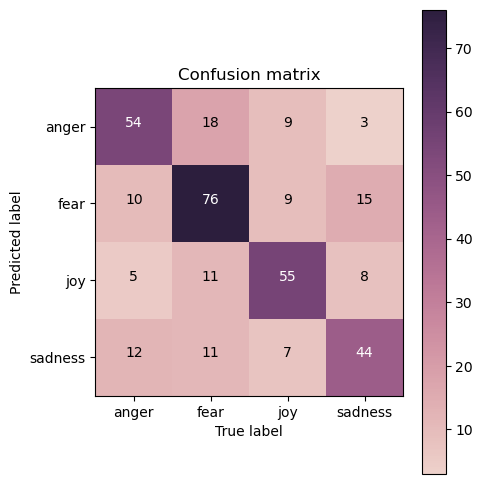

In [34]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

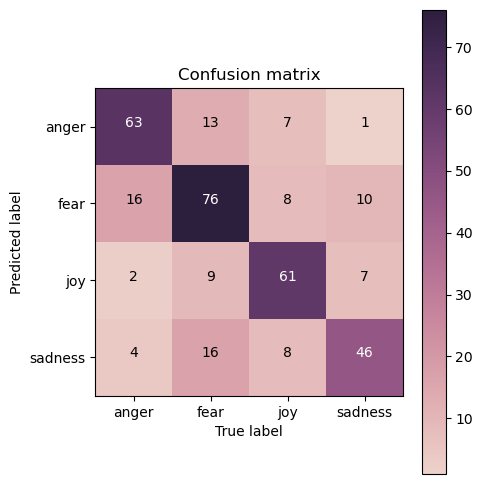

In [35]:
plot_confusion_matrix(cm_1000, classes=my_tags, title='Confusion matrix')

 Can you interpret the results above? What do they mean?

#### Answer here
The elements on the diagonal of the confusion matrix are True Positive. If the value is bigger, the result of this model is better.

From above two CountVectorizer with different numbers of featuers, we can find more features one get better result.

If the value of False Positive is higher(left-down of matrix), they might have more common features.

When I increased the number of features to 1000, I found that the training accuracy remained high, but the testing accuracy improved. This could be due to the overfitting in decision tree with BOW500.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [55]:
from sklearn.naive_bayes import MultinomialNB

MB_model = MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True)

## training!
MB_model = MB_model.fit(X_train, y_train)

## predict!
y_train_pred = MB_model.predict(X_train)
y_test_pred = MB_model.predict(X_test)

In [56]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [57]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[56 14  5  9]
 [ 9 85  5 11]
 [ 9  8 56  6]
 [12 10  6 46]]


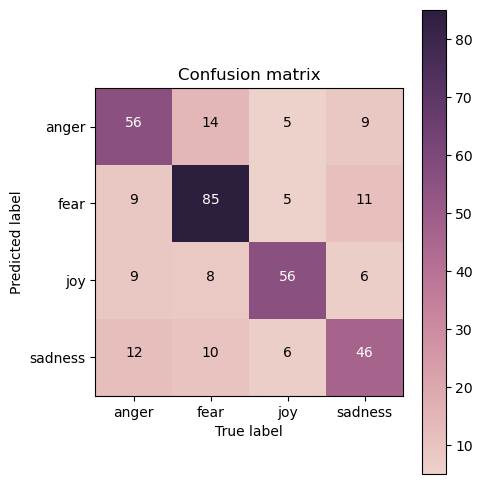

In [58]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

#### Answer here
Decision tree gets higher training accuracy than Navie Bayes but Navie Bayes gets higher testing accuracy than decision tree.

Naive bayes is a simple method for building classifiers and therefor it too simple to classiffy complex situations. Its training and testing accuracy are not high.

We can observe that the training accuracy of the decision tree is as high as 0.99, but the testing accuracy is only 0.66 that is lower than Navie Bayes. Furthermore, when I increased the features of the decision tree, the testing accuracy improved. Decision tree with BOW500 may be have a overfitting problem.

For testing dataset, because decision tree uses work by repeatedly splitting the data to lead to the option, if the test data didn't show in the train dataset, the acuuracy will become lower.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [59]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [60]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2377      joy
1976     fear
100     anger
2537      joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [61]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [62]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_3 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_1 (Softmax)          (None, 4)                 0   

In [63]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('../logs/training_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 2s 9ms/step - loss: 1.3349 - accuracy: 0.3620 - val_loss: 1.2715 - val_accuracy: 0.4669
Epoch 2/25
113/113 [==============================] - 1s 6ms/step - loss: 1.0129 - accuracy: 0.6261 - val_loss: 0.9324 - val_accuracy: 0.6455
Epoch 3/25
113/113 [==============================] - 1s 6ms/step - loss: 0.5961 - accuracy: 0.7899 - val_loss: 0.8042 - val_accuracy: 0.6945
Epoch 4/25
113/113 [==============================] - 1s 6ms/step - loss: 0.4134 - accuracy: 0.8450 - val_loss: 0.8160 - val_accuracy: 0.6801
Epoch 5/25
113/113 [==============================] - 1s 6ms/step - loss: 0.3186 - accuracy: 0.8898 - val_loss: 0.8227 - val_accuracy: 0.6916
Epoch 6/25
113/113 [==============================] - 1s 6ms/step - loss: 0.2590 - accuracy: 0.9106 - val_loss: 0.8856 - val_accuracy: 0.6744
Epoch 7/25
113/113 [==============================] - 1s 6ms/step - loss: 0.2061 - accuracy: 0.9338 - val_loss: 0.9553 - val_accuracy: 0.6657
Epoch 

In [64]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'anger', 'joy', 'fear', 'anger'], dtype=object)

In [65]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [66]:
training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.362026,1.334859,0.466859,1.271482
1,1,0.626073,1.012866,0.645533,0.932418
2,2,0.789925,0.596095,0.694524,0.804168
3,3,0.845004,0.413428,0.680115,0.816039
4,4,0.889842,0.318597,0.691643,0.822718
5,5,0.910601,0.259024,0.674352,0.885604
6,6,0.933850,0.206097,0.665706,0.955265
7,7,0.946582,0.174911,0.680115,0.998031
8,8,0.957930,0.145044,0.668588,1.067423
9,9,0.958760,0.137259,0.665706,1.137438


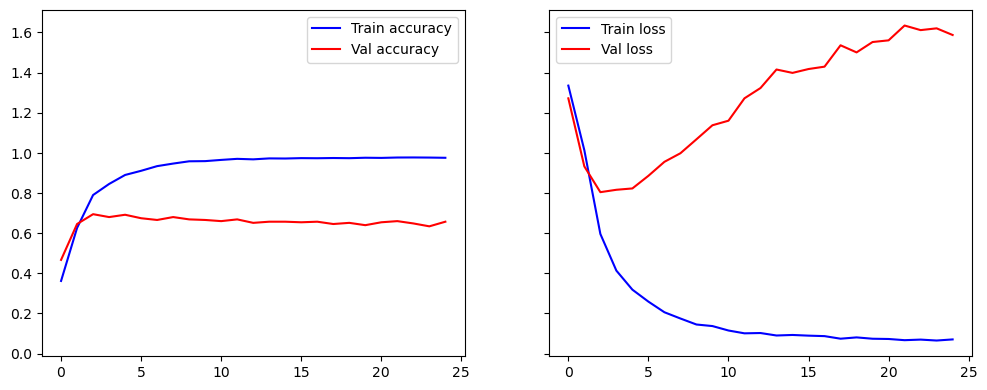

In [67]:
import matplotlib.pyplot as plt

fig,  (ax1,ax2) = plt.subplots(1,2,sharex=True, sharey=True,figsize=(12,4.5))
ax1.plot(training_log['epoch'],training_log['accuracy'],color='b')
ax1.plot(training_log['epoch'],training_log['val_accuracy'],color='r')
ax1.legend(['Train accuracy','Val accuracy'])

ax2.plot(training_log['epoch'],training_log['loss'],color='b')
ax2.plot(training_log['epoch'],training_log['val_loss'],color='r')
ax2.legend(['Train loss','Val loss'])


fig.show()

How to interpret the graphs you got? 

From the two graphs above, we can find that the training accuracy is about 0.9, which is higher than the validation accuracy about 0.6. This model fit validation dataset well due to overfitting.

How are they related to the concept of overfitting/underfitting covered in class?

At epoch 4, when the validation loss starts to increase, the training liss continues to decrease, it indicates overfitting.

To reduce the overfitting, we can reduce the numer of layers in the model or increase the dropout.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [68]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2377,30373,Watch this amazing live.ly broadcast by @hunte...,"[Watch, this, amazing, live.ly, broadcast, by,..."
1976,21119,I can be so shy but once I come out of my shel...,"[I, can, be, so, shy, but, once, I, come, out,..."
100,10100,Have wee pop socks on and they KEEP FALLING OF...,"[Have, wee, pop, socks, on, and, they, KEEP, F..."
2537,30533,Watch this amazing live.ly broadcast by @matt....,"[Watch, this, amazing, live.ly, broadcast, by,..."
872,20015,I am beyond mad that I lost track of a brown s...,"[I, am, beyond, mad, that, I, lost, track, of,..."


In [69]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Watch', 'this', 'amazing', 'live.ly', 'broadcast', 'by', '@', 'huntermcaseyy', '#', 'lively', '#', 'musically']),
       list(['I', 'can', 'be', 'so', 'shy', 'but', 'once', 'I', 'come', 'out', 'of', 'my', 'shell', 'that', "'s", 'it', '😂']),
       list(['Have', 'wee', 'pop', 'socks', 'on', 'and', 'they', 'KEEP', 'FALLING', 'OFF', 'INSIDE', 'MY', 'SHOES', '#', 'rage'])],
      dtype=object)

In [70]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20
# print(training_corpus)
## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)
print(word2vec_model)

Word2Vec<vocab=11885, vector_size=100, alpha=0.025>


In [71]:
#Reference https://github.com/vagadro/Medium/blob/main/3-Word2Vec.ipynb
#          https://github.com/sdimi/average-word2vec/blob/master/notebook.ipynb

#here I use average w2v
w2v_words = list(word2vec_model.wv.index_to_key)
sent_vectors = []
for sent in (training_corpus):
    sent_vec = np.zeros(100)
    cnt_words = 0
    #get all word to vectors in each setence and calculate the average word vectors for each setence
    for word in sent:
        #check the word is in out w2v model fitting dataset
        if word in w2v_words:
            vec = word2vec_model.wv[word]
            sent_vec+=vec
            cnt_words+=1
        if cnt_words != 0:
            sent_vec/=cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors)) 
print(sent_vectors[0])

3613
[-0.0598015   0.0293832  -0.05416695 -0.03876141  0.04026383 -0.05757546
 -0.04577083  0.08940662 -0.0021099   0.00198521  0.05222905 -0.06533026
  0.05468163  0.10389463  0.02797807 -0.00502745  0.03950202 -0.03950113
 -0.00817858 -0.1620148   0.00053145  0.02757377 -0.02321954 -0.05891692
  0.02887526 -0.05783731 -0.03261445 -0.0079488  -0.10481308 -0.04781464
  0.15832981  0.00317044  0.13070231 -0.07050654 -0.0761506   0.01898752
  0.00480486  0.05181237  0.04627095 -0.05438867 -0.08566175  0.00366072
 -0.06683567 -0.07611367 -0.03467689  0.03117899 -0.01051799  0.0071329
 -0.02666307  0.1496263   0.02322359 -0.05430776 -0.08119717 -0.01228968
  0.11315313 -0.00981415  0.0836358  -0.02934615 -0.03320866  0.05333506
 -0.048891    0.00844302  0.01074136 -0.00183956 -0.03773353  0.00561994
 -0.00294708  0.00949848 -0.00762173  0.07702564  0.03217047  0.08987258
  0.06492037 -0.07956361  0.05608747 -0.03284252 -0.00232735 -0.03069349
 -0.04717162 -0.01994984  0.0259862   0.0144076

After obtaining the word vectors for each sentence, we can use PCA or t-SNE to analyze the relationships between sentences.

In [72]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, verbose=2).fit_transform(np.array(sent_vectors))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3613 samples in 0.002s...
[t-SNE] Computed neighbors for 3613 samples in 0.166s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3613
[t-SNE] Computed conditional probabilities for sample 2000 / 3613
[t-SNE] Computed conditional probabilities for sample 3000 / 3613
[t-SNE] Computed conditional probabilities for sample 3613 / 3613
[t-SNE] Mean sigma: 0.006031
[t-SNE] Computed conditional probabilities in 0.153s
[t-SNE] Iteration 50: error = 72.6513214, gradient norm = 0.0310707 (50 iterations in 0.575s)
[t-SNE] Iteration 100: error = 66.1339951, gradient norm = 0.0080330 (50 iterations in 0.562s)
[t-SNE] Iteration 150: error = 64.9791870, gradient norm = 0.0042734 (50 iterations in 0.581s)
[t-SNE] Iteration 200: error = 64.5301285, gradient norm = 0.0029563 (50 iterations in 0.597s)
[t-SNE] Iteration 250: error = 64.2983093, gradient norm = 0.0023974 (50 iterations in 0.516s)
[t-SNE] KL divergence after 250 iterati

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [73]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)


load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [74]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

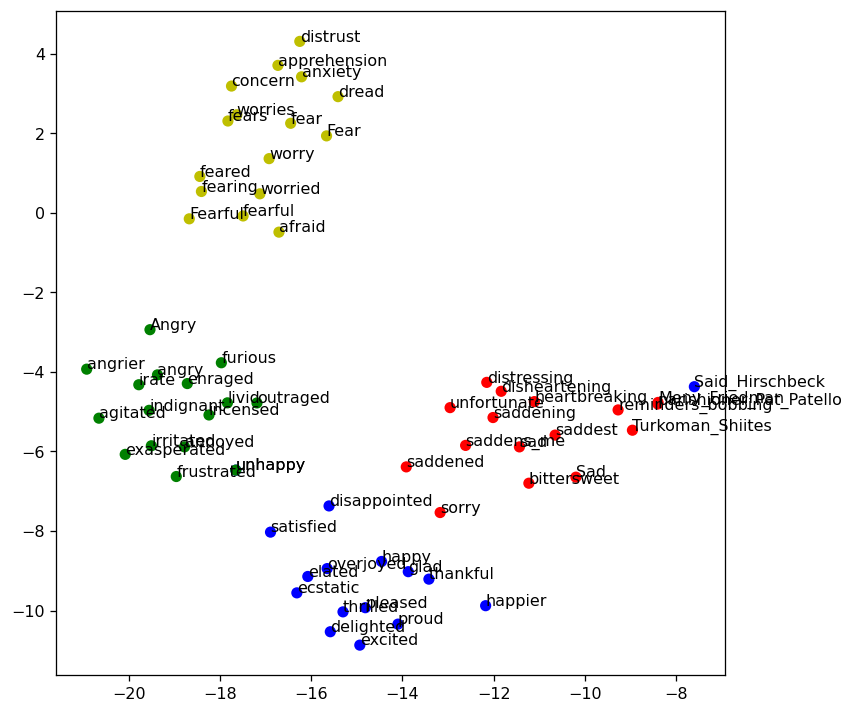

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=20)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

From above graph, I can find when we use word2vec to find similar word for "happy", "unhappy and "said_Hirschbeck in TSEN are not in "happy" group, and "disappointed is closed to "angry" and "sad" groups. 

The similar words for four enmotions, I can find "happy" and "angry" group have same word "unhappy" and in TSEN we can find better related to two group.

From above graph, we can use TSEN to check the outlier for word2vec results.


### 3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 

#### 1. Data preparation

##### 1.1 Download and combine datasets

In [39]:
#because Kaggle just can use 30G GPU per week, I develop the model over my computer.
#read the first dataset

import json
import pandas as pd

text = pd.read_json("../../dm2023-isa5810-lab2-homework/tweets_DM.json",lines=True)

In [40]:
#check the dataset
text

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


In [41]:
text['_score']

0          391
1          433
2          232
3          376
4          989
          ... 
1867530    827
1867531    368
1867532    498
1867533    840
1867534    360
Name: _score, Length: 1867535, dtype: int64

In [42]:
text['_index'][200]

'hashtag_tweets'

In [43]:
print(text['_source'][0]['tweet'])
# text['_source'][1152]

{'hashtags': ['Snapchat'], 'tweet_id': '0x376b20', 'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}


In [44]:
text['_source'][1]

{'tweet': {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
  'tweet_id': '0x2d5350',
  'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'}}

In [45]:
text['text'] = text['_source'].apply(lambda x:x['tweet']['text'])
text['text']

0          People who post "add me on #Snapchat" must be ...
1          @brianklaas As we see, Trump is dangerous to #...
2          Confident of your obedience, I write to you, k...
3                        Now ISSA is stalking Tasha 😂😂😂 <LH>
4          "Trust is not the same as faith. A friend is s...
                                 ...                        
1867530    When you buy the last 2 tickets remaining for ...
1867531    I swear all this hard work gone pay off one da...
1867532    @Parcel2Go no card left when I wasn't in so I ...
1867533    Ah, corporate life, where you can date <LH> us...
1867534               Blessed to be living #Sundayvibes <LH>
Name: text, Length: 1867535, dtype: object

In [46]:
text['tweet_id'] = text['_source'].apply(lambda x:x['tweet']['tweet_id'])
text['tweet_id']

0          0x376b20
1          0x2d5350
2          0x28b412
3          0x1cd5b0
4          0x2de201
             ...   
1867530    0x316b80
1867531    0x29d0cb
1867532    0x2a6a4f
1867533    0x24faed
1867534    0x34be8c
Name: tweet_id, Length: 1867535, dtype: object

In [48]:
#read the second dataset
series = pd.read_csv("../../dm2023-isa5810-lab2-homework/data_identification.csv")
series

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [49]:
#combine two dataset with same tweet_id
data = pd.merge(text,series,how='inner') #need to code data = pd.merge(text,series, on=['tweet_id],how='inner'). Here the results are same.
data

,_score,_index,_source,_crawldate,_type,text,tweet_id,identification
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"People who post ""add me on #Snapchat"" must be ...",0x376b20,train
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"@brianklaas As we see, Trump is dangerous to #...",0x2d5350,train
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"Confident of your obedience, I write to you, k...",0x28b412,test
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,train
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"""Trust is not the same as faith. A friend is s...",0x2de201,test
...,...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,When you buy the last 2 tickets remaining for ...,0x316b80,test
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,I swear all this hard work gone pay off one da...,0x29d0cb,test
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,@Parcel2Go no card left when I wasn't in so I ...,0x2a6a4f,test
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"Ah, corporate life, where you can date <LH> us...",0x24faed,train


In [50]:
#split train dataset and test dataset by identiication
group = data.groupby('identification')

train = group.get_group('train')
test = group.get_group('test')
train

,_score,_index,_source,_crawldate,_type,text,tweet_id,identification
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"People who post ""add me on #Snapchat"" must be ...",0x376b20,train
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"@brianklaas As we see, Trump is dangerous to #...",0x2d5350,train
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,train
5,120,hashtag_tweets,"{'tweet': {'hashtags': ['authentic', 'LaughOut...",2015-06-11 04:44:05,tweets,@RISKshow @TheKevinAllison Thx for the BEST TI...,0x1d755c,train
6,1021,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2c91...",2015-08-18 02:30:07,tweets,Still waiting on those supplies Liscus. <LH>,0x2c91a8,train
...,...,...,...,...,...,...,...,...
1867526,94,hashtag_tweets,"{'tweet': {'hashtags': ['NoWonder', 'Happy'], ...",2016-12-26 02:44:07,tweets,I'm SO HAPPY!!! #NoWonder the name of this sho...,0x321566,train
1867527,627,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x3895...",2015-04-01 08:14:56,tweets,In every circumtance I'd like to be thankful t...,0x38959e,train
1867528,274,hashtag_tweets,"{'tweet': {'hashtags': ['blessyou'], 'tweet_id...",2016-11-17 23:46:22,tweets,there's currently two girls walking around the...,0x2cbca6,train
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"Ah, corporate life, where you can date <LH> us...",0x24faed,train


In [52]:
#read the final dataset
emotion = pd.read_csv('../../dm2023-isa5810-lab2-homework/emotion.csv')

#conbine the third dataset with training data because training data has label and test data don't
train_data = pd.merge(train,emotion,how='inner')
train_data

,_score,_index,_source,_crawldate,_type,text,tweet_id,identification,emotion
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"People who post ""add me on #Snapchat"" must be ...",0x376b20,train,anticipation
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"@brianklaas As we see, Trump is dangerous to #...",0x2d5350,train,sadness
2,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,train,fear
3,120,hashtag_tweets,"{'tweet': {'hashtags': ['authentic', 'LaughOut...",2015-06-11 04:44:05,tweets,@RISKshow @TheKevinAllison Thx for the BEST TI...,0x1d755c,train,joy
4,1021,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2c91...",2015-08-18 02:30:07,tweets,Still waiting on those supplies Liscus. <LH>,0x2c91a8,train,anticipation
...,...,...,...,...,...,...,...,...,...
1455558,94,hashtag_tweets,"{'tweet': {'hashtags': ['NoWonder', 'Happy'], ...",2016-12-26 02:44:07,tweets,I'm SO HAPPY!!! #NoWonder the name of this sho...,0x321566,train,joy
1455559,627,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x3895...",2015-04-01 08:14:56,tweets,In every circumtance I'd like to be thankful t...,0x38959e,train,joy
1455560,274,hashtag_tweets,"{'tweet': {'hashtags': ['blessyou'], 'tweet_id...",2016-11-17 23:46:22,tweets,there's currently two girls walking around the...,0x2cbca6,train,joy
1455561,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"Ah, corporate life, where you can date <LH> us...",0x24faed,train,joy


In [53]:
#clean the duplicating data
new_train = train_data['text'].drop_duplicates()
new_train

0          People who post "add me on #Snapchat" must be ...
1          @brianklaas As we see, Trump is dangerous to #...
2                        Now ISSA is stalking Tasha 😂😂😂 <LH>
3          @RISKshow @TheKevinAllison Thx for the BEST TI...
4               Still waiting on those supplies Liscus. <LH>
                                 ...                        
1455558    I'm SO HAPPY!!! #NoWonder the name of this sho...
1455559    In every circumtance I'd like to be thankful t...
1455560    there's currently two girls walking around the...
1455561    Ah, corporate life, where you can date <LH> us...
1455562               Blessed to be living #Sundayvibes <LH>
Name: text, Length: 1451778, dtype: object

##### 1.2 data preprocessing

#### stop words
Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

#### stemming
Stemming is the process of reducing inflection towards the base-root form. All the words are having their root-base form, which can be used in different version according to tenses

In [54]:
import nltk
import re
# nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#download stop words and set stop words and stemmer

# nltk.download('stopwords')
# nltk.download('wordnet')

stop_words = (stopwords.words('english'))
stemmer = SnowballStemmer('english')

In [55]:


def clean_and_preprocess(text):
#remove words that cause confusion
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\s*@\w+', '', text)
    text = re.sub(r'\s*\B@\w+', '', text)
    text = re.sub(r'\s*@\S+', '', text)
    text = re.sub(r'\s*@\S+\b', '', text)
    text = re.sub(r'<LH>', '', text)

#when training model, uppercase and lowercase be considered as distinct words
    words = text.lower().split()

#stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [56]:
#clean and preprocess data
train_data['text'] = train_data['text'].apply(clean_and_preprocess)
test['text'] = test['text'].apply(clean_and_preprocess)
train_data

C:\Users\530\AppData\Local\Temp\ipykernel_8448\4148257826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['text'] = test['text'].apply(clean_and_preprocess)


,_score,_index,_source,_crawldate,_type,text,tweet_id,identification,emotion
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,"peopl post ""add #snapchat"" must dehydrated. cu...",0x376b20,train,anticipation
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"see, trump danger #freepress around world. #tr...",0x2d5350,train,sadness
2,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,issa stalk tasha 😂😂😂,0x1cd5b0,train,fear
3,120,hashtag_tweets,"{'tweet': {'hashtags': ['authentic', 'LaughOut...",2015-06-11 04:44:05,tweets,thx best time tonight. stories! heartbreak #au...,0x1d755c,train,joy
4,1021,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2c91...",2015-08-18 02:30:07,tweets,still wait suppli liscus.,0x2c91a8,train,anticipation
...,...,...,...,...,...,...,...,...,...
1455558,94,hashtag_tweets,"{'tweet': {'hashtags': ['NoWonder', 'Happy'], ...",2016-12-26 02:44:07,tweets,i'm happy!!! #nowond name show! #happy! 👏👏👏👏👏,0x321566,train,joy
1455559,627,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x3895...",2015-04-01 08:14:56,tweets,everi circumt i'd like thank almighti jesus ch...,0x38959e,train,joy
1455560,274,hashtag_tweets,"{'tweet': {'hashtags': ['blessyou'], 'tweet_id...",2016-11-17 23:46:22,tweets,there current two girl walk around librari han...,0x2cbca6,train,joy
1455561,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,"ah, corpor life, date use relat anachron last ...",0x24faed,train,joy


In [57]:
test

,_score,_index,_source,_crawldate,_type,text,tweet_id,identification
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,"confid obedience, write you, know even ask. (p...",0x28b412,test
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,"""trust faith. friend someon trust. put faith a...",0x2de201,test
9,66,hashtag_tweets,"{'tweet': {'hashtags': ['materialism', 'money'...",2015-09-09 09:22:55,tweets,enough ? satisfi ? goal realli money ? #materi...,0x218443,test
30,104,hashtag_tweets,"{'tweet': {'hashtags': ['GodsPlan', 'GodsWork'...",2015-10-10 14:33:26,tweets,"god woke up, chase day #godsplan #godswork",0x2939d5,test
33,310,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2628...",2016-10-23 08:49:50,tweets,"tough times, turn symbol hope?",0x26289a,test
...,...,...,...,...,...,...,...,...
1867525,602,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2913...",2016-12-10 18:01:00,tweets,"""for messag ye heard beginning, love one anoth...",0x2913b4,test
1867529,598,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a98...",2015-01-04 14:40:55,tweets,"""there lad here, hath five barley loaves, two ...",0x2a980e,test
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,buy last 2 ticket remain show sell out.. #mixe...,0x316b80,test
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,swear hard work gone pay one day😈💰💸,0x29d0cb,test


In [58]:
#save the datasets that have been prepocessed and cleaned 

train_data.to_json('train_data.json')
test.to_json('test_data.json')

#### 2. train the model

##### 2.1 download preprocessing data

In [ ]:
import pandas as pd
#download dataset from data preparation
train = pd.read_json('train_data.json')
train

In [ ]:
test = pd.read_json('test_data.json')
test

In [ ]:
from sklearn.model_selection import train_test_split
#split training data to training data and validation data
train_data,valid_data = train_test_split(train,test_size=0.2,random_state=12)

##### 2.2 classification : logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
#use 2000 features
BOW_2000 = CountVectorizer(max_features=2000, tokenizer=nltk.word_tokenize,token_pattern=None)

# I use text to train data and emotion to be the label
BOW_2000.fit(train_data['text'])
x_train = BOW_2000.transform(train_data['text'])
y_train = train_data['emotion']
x_valid = BOW_2000.transform(valid_data['text'])
y_valid = valid_data['emotion']

In [ ]:
lr = LogisticRegression(random_state=12) #logistic Regression

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
y_train_pred = lr.predict(x_train)
y_valid_pred = lr.predict(x_valid)

In [ ]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_valid, y_pred=y_valid_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

![Caption for the picture.](img/lr_a.png)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_valid, y_pred=y_valid_pred) 

In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [ ]:
# plot your confusion matrix
my_tags = [emo for emo in train_data['emotion'].value_counts().keys()]
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

![Caption for the picture.](img/lr_m.png)

##### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(x_train,y_train)


In [ ]:
y_train_pred = MNB.predict(x_train)
y_valid_pred = MNB.predict(x_valid)

In [ ]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_valid, y_pred=y_valid_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

![Caption for the picture.](img/NB_a.png)

In [ ]:
cm = confusion_matrix(y_true=y_valid, y_pred=y_valid_pred) 
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

![Caption for the picture.](img/lr_m.png)

##### random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, n_estimators=1000, max_depth=24, random_state=False)
rf.fit(x_train, y_train)

In [ ]:
y_train_pred = rf.predict(x_train)
y_valid_pred = rf.predict(x_valid)

In [ ]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_valid, y_pred=y_valid_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

![Caption for the picture.](img/rf_a.png)

In [ ]:
cm = confusion_matrix(y_true=y_valid, y_pred=y_valid_pred) 
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

![Caption for the picture.](img/rf_m.png)

In [ ]:
x_test = BOW_2000.transform(test['text'])

In [ ]:
#predict and save result
BOW_2000_result = lr.predict(x_test)
BOW_2000_result

In [ ]:
pd.DataFrame({'id':test['tweet_id'],'emotion':BOW_2000_result}).to_csv('lr_result.csv',index=False)

In [ ]:
MNB_result = MNB.predict(x_test)
pd.DataFrame({'id':test['tweet_id'],'emotion':MNB_result}).to_csv('mnb_result.csv',index=False)

In [ ]:
rf_result = rf.predict(x_test)

pd.DataFrame({'id':test['tweet_id'],'emotion':rf_result}).to_csv('rf.csv',index=False)

##### 2.3 LSTM


In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

#preprocessing data
tokenizer = keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(train_data['text'].tolist())
tokenizer.fit_on_texts(valid_data['text'].tolist())
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=100, padding='post')
    return padded_sequences

X_train_keras = get_sequences(tokenizer, train_data['text'].tolist())
X_valid_keras = get_sequences(tokenizer, valid_data['text'].tolist())

In [ ]:
emotions = set(train_data['emotion'].tolist())
emotions_to_index = dict((c, i) for i, c in enumerate(emotions))
index_to_emotions = dict((v, k) for k, v in emotions_to_index.items())
names_to_ids = lambda labels: np.array([emotions_to_index.get(x) for x in labels])

y_train_keras = names_to_ids(train_data['emotion'].tolist())
y_valid_keras = names_to_ids(valid_data['emotion'].tolist())

In [ ]:
X_test_keras = get_sequences(tokenizer,test['text'].tolist())

In [ ]:
#CudnnLSTM model

import tensorflow as tf
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from keras.callbacks import CSVLogger
tf.debugging.set_log_device_placement(True)
CudnnLSTM_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 256, input_length=100),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(CuDNNLSTM(100, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(CuDNNLSTM(100)),

    tf.keras.layers.Dense(8, activation='softmax')
])

csv_logger = CSVLogger('cudnn_2.csv')

CudnnLSTM_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

CudnnLSTM_model.summary()

history_BILSTM = CudnnLSTM_model.fit(
                    X_train_keras, y_train_keras,
                    epochs=4,
                    batch_size=32, 
                    callbacks=[csv_logger],
                    validation_data = (X_valid_keras, y_valid_keras)
)

CudnnLSTM_model.save('CudnnLSTM_e4_l_100_2.h5', save_format='tf')

In [ ]:
CudnnLSTM_result = CudnnLSTM_model.predict(X_test_keras, batch_size=32)
pd.DataFrame(CudnnLSTM_result).to_csv("CudnnLSTM_e4_l_100.csv")
CudnnLSTM_pred_list = np.argmax(CudnnLSTM_result, axis=1)
id_to_emotion = lambda labels: np.array([index_to_emotions.get(x) for x in CudnnLSTM_pred_list])
CudnnLSTM_id_to_emotion = id_to_emotion(CudnnLSTM_pred_list)

In [ ]:
output = test[['tweet_id']].reset_index(drop=True)
output['emotion']=pd.Series(CudnnLSTM_id_to_emotion)
output.columns = ['id', 'emotion']
output.to_csv('result.csv', index=False) # save result

### result discussion


I have conducted a total of 3 classification and 1 LSTM. The public and 

private score for each model are below. 

Scores are arranged from high to low in the following order:

Logistic Regression's private and public scores are 0.40233 and 0.41205

Naive Bayes classification's private and public scores are 0.378 and 0.3914

Random forest classfication's private and public scores are 0.32976 and 0.33401

Random forest get lowerst score may the depeth is too shallow and it cannot fit the dataset consist of about 1 million data.
But if I use higher depth to fit the model, it will take too much time.

LSTM get the better score than classification and private and public scores are 0.44302 and 0.45568


### The encountered difficult

When Preprocessing the data, I didn't account for the impact of elements like https, <LH>, etc. on the text. Additionally, I overlooked the influnce of stop words and stemming. As a result, the initial outcomes were quite poor.

### I can improved

Try on better NLP model like BERT.
Adjusted and utilized better parameters to train my best model, Cudnn LSTM.